# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment, for example, when you flip a coin it can by either head or tails.

In [1]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Binomial(10, 0.2) distribution where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial.
import numpy as np
np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


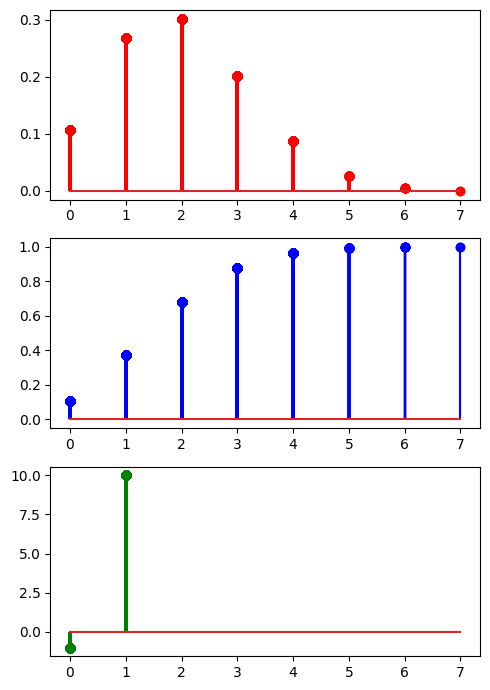

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

In [4]:
from scipy.stats import norm

# Función de densidad de probabilidad (PDF) en un punto específico

def dnorm(x, media=0, desviacion=1):
    resultado = norm.pdf(x, loc=media, scale=desviacion)
    return resultado

print(f"La probabilidad de seleccionar un valor al azar de una distribución normal con media 0 y desviación estándar 1, y que este valor sea exactamente 1, es de: {dnorm(1, 0, 1)}")


# Función de distribución acumulada (CDF) en un punto específico

def pnorm(x, mean=0, std=1):
    resultado = norm.cdf(x, loc=mean, scale=std)
    return resultado

print(f"La probabilidad acumulada de que un valor seleccionado al azar de una distribución normal con media 0 y desviación estándar 1 sea menor o igual a 1 es de: {pnorm(1, 0, 1)}")

# Generar muestras aleatorias de la distribución normal

def rnorm(n, media=0, std=1):
    resultado = norm.rvs(loc=media, scale=std, size=n)
    return resultado

print(f'10 numeros aleatorios para una distribución normal (media=0, desviación=1): {rnorm(10, 0, 1)}')

# Calcular el percentil correspondiente a la probabilidad acumulada especificada

def qnorm(x, mean=0, std=1):
    result = norm.ppf(q=x, loc=mean, scale=std)
    return result

print(f"El valor en una distribución normal (media=0, desviacion=1) con una probabilidad acumulada de 0.9 es: {qnorm(0.9, 0, 1)}")



   

La probabilidad de seleccionar un valor al azar de una distribución normal con media 0 y desviación estándar 1, y que este valor sea exactamente 1, es de: 0.24197072451914337
La probabilidad acumulada de que un valor seleccionado al azar de una distribución normal con media 0 y desviación estándar 1 sea menor o igual a 1 es de: 0.8413447460685429
10 numeros aleatorios para una distribución normal (media=0, desviación=1): [-0.87798259 -0.82688035 -0.22647889  0.36736551  0.91358463 -0.80317895
  1.49268857 -0.2711236  -0.02136729 -0.74721168]
El valor en una distribución normal (media=0, desviacion=1) con una probabilidad acumulada de 0.9 es: 1.2815515655446004


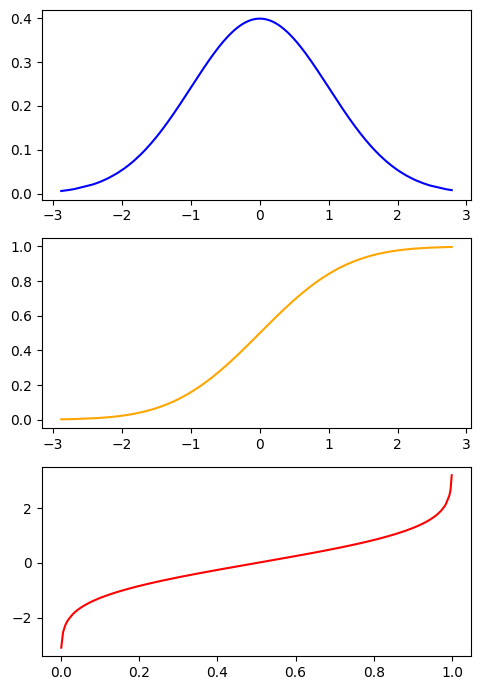

In [12]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(4)

media = 0
std = 1
data = sorted(rnorm(1000, 0, 1))

pdf = dnorm(data, media, std)
cdf = pnorm(data, media, std)
ppf = qnorm(data, media, std)

fig, axis = plt.subplots(3, 1, figsize=(5, 7))

axis[0].plot(data, pdf, color='blue')
axis[1].plot(data, cdf, color='orange')
axis[2].plot(data, ppf, color='red')

plt.tight_layout()

plt.show()


In [23]:
from scipy.stats import uniform
import numpy as np

def duniform(x, limite_inferior=0, rango=1):
    resultado = uniform.pdf(x, loc=limite_inferior, scale=rango)
    return resultado

print('Ejemplo lanzamiento de dado: x=nº a examinar, loc=limite inferior, scale=diferencia entre el limite inferior y el superior - el dado va de 1 a 6, 1 es el limite inferior y 5 es el rango (6-1)')
print(f'La probabilidad de que salga un 4 al lanzar el dado es del: {np.round(duniform(4, 1, 5) * 100, 2)}%')

def puniform(x, limite_inferior=0, rango=1):
    resultado = uniform.cdf(x, loc=limite_inferior, scale=rango)
    return resultado

print(f'La probabilidad acumulada de que un valor x en una d. uniforme sea menor o igual a 3 es del: {np.round(puniform(3, 1, 5)*100, 2)}%')

def quniform(x, limite_inferior=0, rango=1):
    result = uniform.ppf(q=x, loc=limite_inferior, scale=rango)
    return result

print(f'El valor en una d.uniforme con una probabilidad acumulada del 80% es: {quniform(0.8, 1, 5)}')

def runiform(n, limite_inferior=0, rango=1):
    resultado = uniform.rvs(loc=limite_inferior, scale=rango, size=n)
    return resultado

print(f'10 numeros aleatorios para una distribucion uniforme: {runiform(10, 1, 5)}')


Ejemplo lanzamiento de dado: x=nº a examinar, loc=limite inferior, scale=diferencia entre el limite inferior y el superior - el dado va de 1 a 6, 1 es el limite inferior y 5 es el rango (6-1)
La probabilidad de que salga un 4 al lanzar el dado es del: 20.0%
La probabilidad acumulada de que un valor x en una d. uniforme sea menor o igual a 3 es del: 40.0%
El valor en una d.uniforme con una probabilidad acumulada del 80% es: 5.0
10 numeros aleatorios para una distribucion uniforme: [2.48213099 3.42977872 3.17044621 2.683032   4.76030734 4.74553288
 1.86524093 3.25051855 5.44476593 5.72620667]


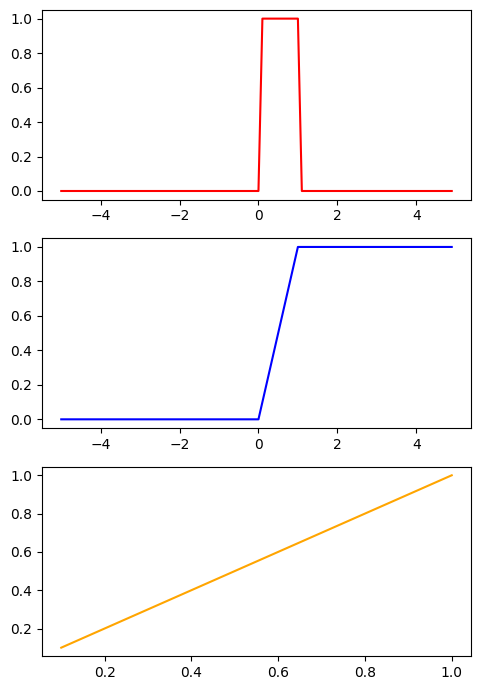

In [35]:
np.random.seed(5)

limite_inferior = 0
rango = 1
data = np.arange(-5, 5, 0.1)


pdf = duniform(data, limite_inferior, rango)
cdf = puniform(data, limite_inferior, rango)
ppf = quniform(data, limite_inferior, rango)

fig, axis = plt.subplots(3, 1, figsize=(5, 7))

axis[0].plot(data, pdf, color='red')
axis[1].plot(data, cdf, color='blue')
axis[2].plot(data, ppf, color='orange')

plt.tight_layout()

plt.show()